## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [47]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [48]:
mammals_with_gt_20000_genes = euk[(euk.Class == 'Mammals') &
    (pd.to_numeric(euk["Number of genes"], errors='coerce') >= 20000)].Species

print("Total number of mammals that have at least 20,000 genes: ",
    mammals_with_gt_20000_genes.count())

print("Total unique counts of mammals that have at least 20,000 genes: ", mammals_with_gt_20000_genes.nunique())

print("\nScientific names:")

for val in mammals_with_gt_20000_genes.sort_values():
    print(val)

Total number of mammals that have at least 20,000 genes:  134
Total unique counts of mammals that have at least 20,000 genes:  126

Scientific names:
Acinonyx jubatus
Ailuropoda melanoleuca
Aotus nancymaae
Balaenoptera acutorostrata scammoni
Bison bison bison
Bos indicus
Bos indicus x Bos taurus
Bos mutus
Bos taurus
Bos taurus
Bubalus bubalis
Callithrix jacchus
Callorhinus ursinus
Camelus bactrianus
Camelus dromedarius
Camelus ferus
Canis lupus dingo
Canis lupus familiaris
Capra hircus
Carlito syrichta
Castor canadensis
Cavia porcellus
Cebus capucinus imitator
Ceratotherium simum simum
Cercocebus atys
Cervus elaphus hippelaphus
Chinchilla lanigera
Chlorocebus sabaeus
Chrysochloris asiatica
Colobus angolensis palliatus
Condylura cristata
Cricetulus griseus
Cricetulus griseus
Cricetulus griseus
Dasypus novemcinctus
Delphinapterus leucas
Desmodus rotundus
Dipodomys ordii
Echinops telfairi
Elephantulus edwardii
Enhydra lutris kenyoni
Eptesicus fuscus
Equus asinus
Equus caballus
Equus przew

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [49]:
# Your code here . . .
euk.Class[(euk.Kingdom == "Animals")].value_counts()

,count
Class,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [50]:
# Your code here . . .
for cls in euk[(euk.Kingdom == "Animals")].Class.unique():
    print(cls, euk[euk.Class == cls].Species.nunique())

Roundworms 116
Insects 402
Fishes 218
Other Animals 171
Mammals 313
Amphibians 6
Birds 144
Flatworms 34
Reptiles 38


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [41]:
# Your code here . . .
for mammal in euk[(euk.Class == "Mammals")].Species.unique():
    if mammal.split(" ")[0].startswith("Macaca"):
        print(mammal)

Macaca mulatta
Macaca fascicularis
Macaca nemestrina
Macaca fuscata fuscata


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [42]:
# Your code here . . .
euk["Species"] = euk.Species.str.split().str[0:2].str.join(" ")
newdf = euk[["Species", "Kingdom", "Class", "Size (Mb)", "Number of genes", "Number of proteins"]]
newdf

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311,48265
2,Glycine max,Plants,Land Plants,979.046000,59847,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,-,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,-,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,-,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [43]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
classList = []
counts = []
for cls in newdf[(newdf.Kingdom == "Animals")].Class.unique():
    classList.append(cls)
    counts.append(newdf[newdf.Class == cls].Species.nunique())
df = pd.DataFrame({'counts': counts}, index=classList)
df

,counts
Roundworms,111
Insects,360
Fishes,217
Other Animals,169
Mammals,296
Amphibians,6
Birds,140
Flatworms,34
Reptiles,38


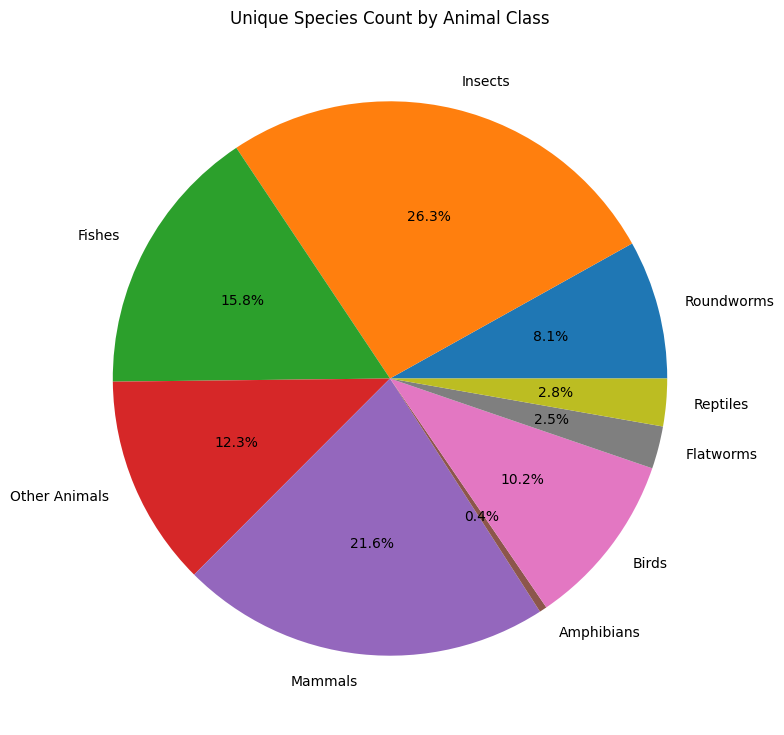

In [44]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
import matplotlib.pyplot as plt
plot = df.plot.pie(
    y='counts',
    labels=df.index,
    autopct='%1.1f%%',
    figsize=(10, 9),
    legend=False,
)
plt.ylabel('')
plt.title('Unique Species Count by Animal Class')
plt.show()